In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set display options for better visualization
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Load the combined dataset
file_path = '../data/processed/lumbrasgigabase/lumbrasgigabase.csv'
df = pd.read_csv(file_path)
print(f"Loaded dataset from {file_path}")

# Display basic information about the dataset
print("\nDataset Overview:")
print("-" * 50)
print(f"Total number of games: {len(df):,}")
print(f"Number of columns: {len(df.columns)}")
print("\nColumns in the dataset:")
print(df.columns.tolist())

Loaded dataset from ../data/processed/lumbrasgigabase/lumbrasgigabase.csv

Dataset Overview:
--------------------------------------------------
Total number of games: 14,999,555
Number of columns: 18

Columns in the dataset:
['event', 'site', 'date', 'round', 'white', 'black', 'result', 'white_elo', 'black_elo', 'white_title', 'black_title', 'eco', 'opening', 'time_control', 'import_date', 'source', 'moves', 'eval_info']


In [2]:
# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print("-" * 50)
print(df.head())

# null values
print("\nNull Values in the dataset:")
print("-" * 50)
print(df.isnull().sum())



First few rows of the dataset:
--------------------------------------------------
   event site        date round   white             black result  white_elo  \
0    NaN  NaN         NaN   NaN     NaN               NaN    NaN        NaN   
1  Blitz  NaN  2024.06.28     -  Ac1000    LaYucaReyChess    1-0   2556.000   
2  Blitz  NaN  2024.08.01     -  Ac1000  Kavalenya_Leonid    0-1   2562.000   
3  Blitz  NaN  2024.07.03     -  Ac1000      ranger-power    1-0   2557.000   
4  Blitz  NaN  2024.02.14   NaN  Ac1000  a1b3c1a2c3b1a3c2    1-0   2617.000   

   black_elo white_title black_title   eco opening time_control import_date  \
0        NaN         NaN         NaN   NaN     NaN          NaN         NaN   
1   2523.000         NaN         NaN  A80t     NaN        180+0  2024-08-06   
2   2525.000         NaN         NaN  A13m     NaN        180+0  2024-10-01   
3   2407.000         NaN         NaN  E90r     NaN        180+0  2024-10-01   
4   2588.000         NaN         NaN  A46g     


Percentage of Null Values:
--------------------------------------------------
event          25.190
site           41.610
date            0.070
round          15.240
white           0.070
black           0.070
result          0.070
white_elo      10.590
black_elo      10.700
white_title    84.950
black_title    84.970
eco             0.070
opening        98.080
time_control   69.920
import_date    87.170
source          0.000
moves           0.050
eval_info      99.700
dtype: float64

Number of complete games (non-null essential columns): 14,987,796

Games by Decade:
--------------------------------------------------
decade
1800.000         70
1810.000         12
1820.000         34
1830.000        456
1840.000        296
1850.000       1528
1860.000       1776
1870.000       1406
1880.000       2654
1890.000       3294
1900.000       2546
1910.000       2385
1920.000       6131
1930.000       9744
1940.000       7509
1950.000      22339
1960.000      41858
1970.000      83088
1980.00

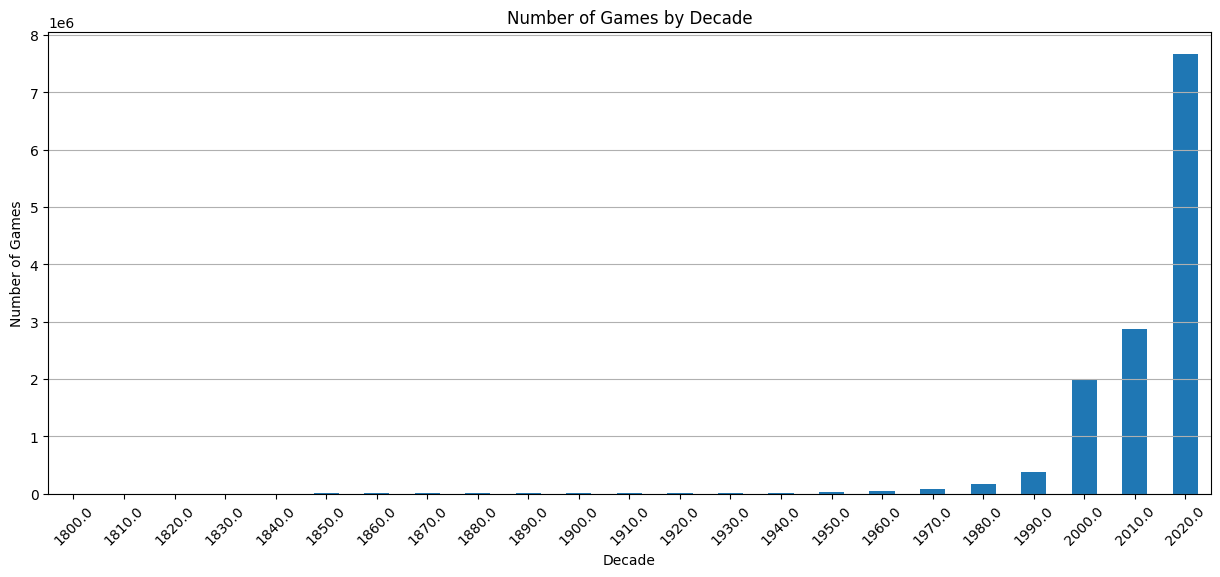

In [4]:
# Calculate percentage of null values
print("\nPercentage of Null Values:")
print("-" * 50)
null_percentages = (df.isnull().sum() / len(df) * 100).round(2)
print(null_percentages)

# Analyze complete games (non-null essential columns)
essential_columns = ['white', 'black', 'result', 'moves', 'date']
complete_games = df.dropna(subset=essential_columns)
print(f"\nNumber of complete games (non-null essential columns): {len(complete_games):,}")

# Analyze time periods
df['year'] = pd.to_datetime(df['date'], errors='coerce').dt.year
df['decade'] = (df['year'] // 10) * 10

print("\nGames by Decade:")
print("-" * 50)
decade_counts = df['decade'].value_counts().sort_index()
print(decade_counts)

# Plot games by decade
plt.figure(figsize=(15, 6))
decade_counts.plot(kind='bar')
plt.title('Number of Games by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()


Game Results Distribution (excluding null values):
--------------------------------------------------
result
1-0        6292205
0-1        5318783
1/2-1/2    3378024
Name: count, dtype: int64


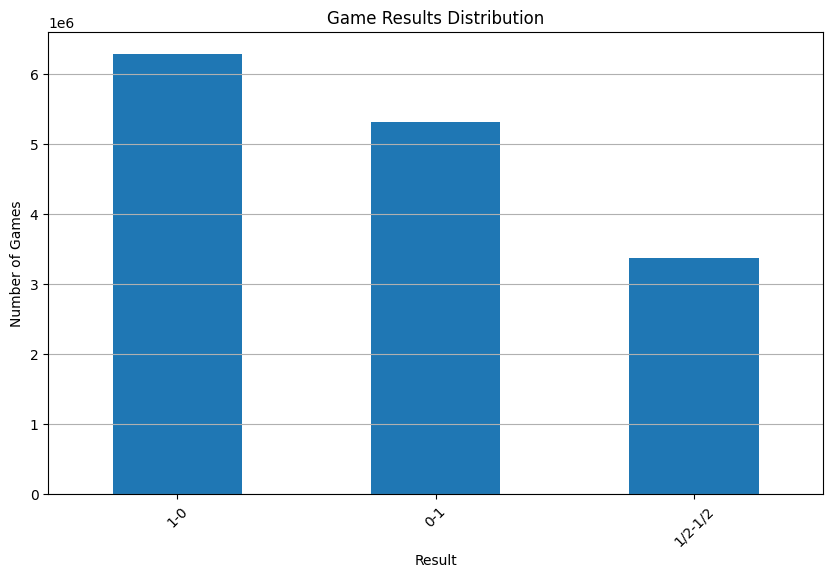

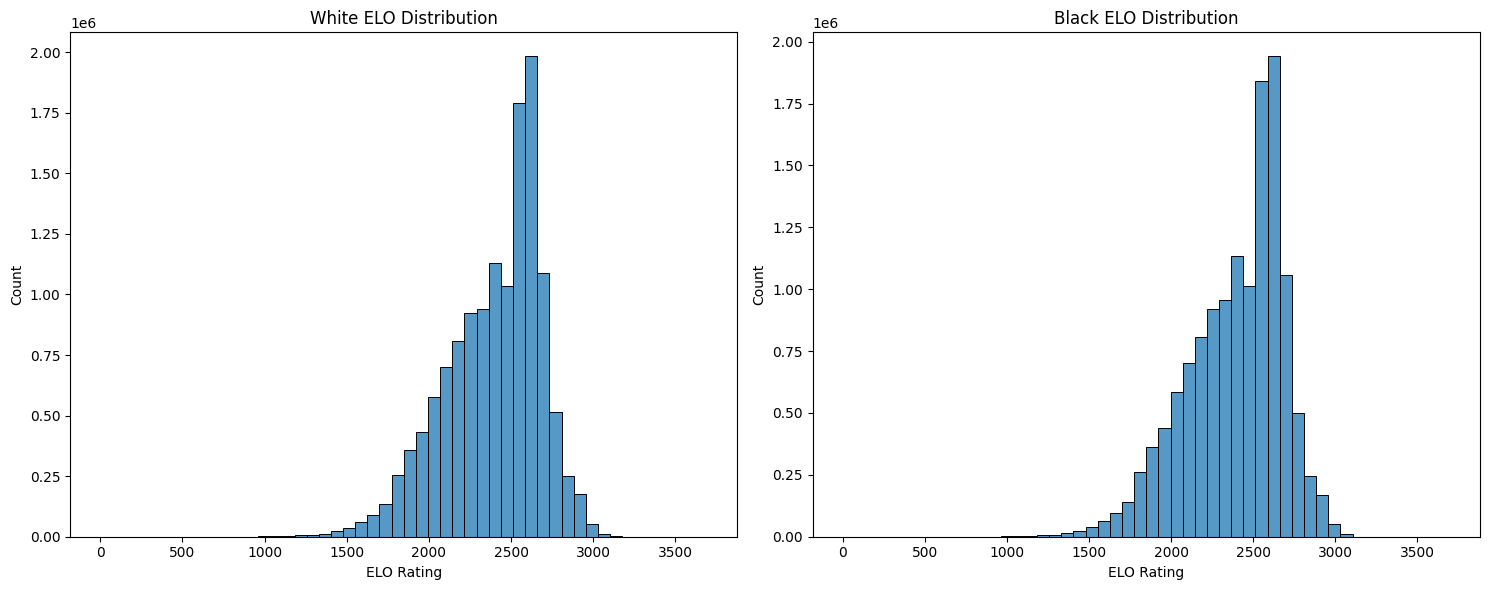


Player Title Distribution:
--------------------------------------------------

White Titles:
white_title
NaN    12742002
IM       606540
FM       579848
GM       555468
BOT      220770
CM       124954
NM        71062
WFM       35960
WIM       27101
WGM       20651
WCM       12754
LM         2117
WC          103
WF           94
AFM          25
AIM          17
AGM          15
SIM          10
NI           10
ACM           9
*             8
IV            7
WNM           6
1             5
FI            4
FC            4
III           3
I             2
MC            2
MK            2
�             1
SI            1
Name: count, dtype: int64

Black Titles:
black_title
NaN       12744605
IM          604002
FM          580343
GM          550138
BOT         221727
CM          126193
NM           71240
WFM          37230
WIM          28178
WGM          19895
WCM          13530
LM            2132
WC             104
WF              91
AFM             28
AIM             22
SIM             11
IV    

In [5]:

# Analyze game results distribution
print("\nGame Results Distribution (excluding null values):")
print("-" * 50)
result_counts = df['result'].value_counts()
print(result_counts)

# Plot result distribution
plt.figure(figsize=(10, 6))
result_counts.plot(kind='bar')
plt.title('Game Results Distribution')
plt.xlabel('Result')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()

# Analyze ELO rating distributions
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df[df['white_elo'].notna()], x='white_elo', bins=50)
plt.title('White ELO Distribution')
plt.xlabel('ELO Rating')

plt.subplot(1, 2, 2)
sns.histplot(data=df[df['black_elo'].notna()], x='black_elo', bins=50)
plt.title('Black ELO Distribution')
plt.xlabel('ELO Rating')
plt.tight_layout()
plt.show()

# Analyze player titles
print("\nPlayer Title Distribution:")
print("-" * 50)
print("\nWhite Titles:")
print(df['white_title'].value_counts(dropna=False))
print("\nBlack Titles:")
print(df['black_title'].value_counts(dropna=False))

In [6]:

# Analyze opening moves patterns (first few moves)
def get_first_moves(moves_str, n=3):
    if pd.isna(moves_str):
        return None
    moves = moves_str.split()
    return ' '.join(moves[:n*2])  # n*2 because each move has white and black part

df['first_moves'] = df['moves'].apply(lambda x: get_first_moves(x))

print("\nMost Common Opening Sequences (first 3 moves):")
print("-" * 50)
print(df['first_moves'].value_counts().head(10))

# Save processed dataframe for further analysis
processed_df = df[['white', 'black', 'result', 'white_elo', 'black_elo', 
                   'white_title', 'black_title', 'eco', 'moves', 'year']]
processed_df.to_csv('../data/processed/lumbrasgigabase_cleaned.csv', index=False)
print("\nProcessed data saved to '../data/processed/lumbrasgigabase_cleaned.csv'")

# Calculate basic game length statistics
df['move_count'] = df['moves'].str.count(' ').add(1)
print("\nGame Length Statistics:")
print("-" * 50)
print(df['move_count'].describe())

# Plot game length distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df[df['move_count'].notna()], x='move_count', bins=50)
plt.title('Distribution of Game Lengths')
plt.xlabel('Number of Moves')
plt.ylabel('Frequency')
plt.show()


Most Common Opening Sequences (first 3 moves):
--------------------------------------------------
first_moves
1.e4 c5 2.Nf3 d6 3.d4 cxd4     656283
1.e4 e5 2.Nf3 Nc6 3.Bb5 a6     374625
1.e4 c5 2.Nf3 Nc6 3.d4 cxd4    335832
1.e4 c5 2.Nf3 e6 3.d4 cxd4     325877
1.d4 Nf6 2.c4 g6 3.Nc3 Bg7     295006
1.d4 Nf6 2.c4 e6 3.Nc3 Bb4     265534
1.d4 Nf6 2.c4 e6 3.Nf3 d5      159162
1.e4 e5 2.Nf3 Nc6 3.Bc4 Bc5    156185
1.d4 d5 2.c4 c6 3.Nf3 Nf6      145819
1.d4 Nf6 2.c4 g6 3.Nc3 d5      142862
Name: count, dtype: int64


OSError: [Errno 28] No space left on device